In [97]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

import acquire
import requests
import prepare


plt.rcParams['figure.figsize'] = [12,8]

In [2]:
df = pd.read_csv('total_sales_data.csv')
df.head(1)

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
df = prepare.prepare_sales_data(df)
df.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92


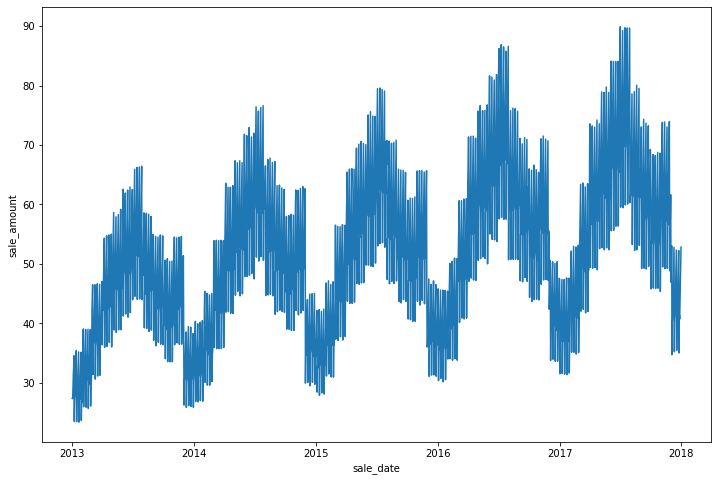

In [14]:
# view data for best split methods
plt.figure(figsize = (12,8))
date = df.groupby('sale_date').mean()
sns.lineplot(data = date, x='sale_date', y='sale_amount')
plt.show()

In [31]:
# split by human based approach
train=date[:'2016']
test=date['2017':]

In [53]:
train.head()

,item,sale_amount,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total
sale_date,,,,,,,,,,,
2013-01-01 00:00:00+00:00,25.5,27.392,455588.0,5.5,5.5,78224.8,25.5,5.1604,2.384688e+11,2.384688e+11,147.68802
2013-01-02 00:00:00+00:00,25.5,27.356,455589.0,5.5,5.5,78224.8,25.5,5.1604,2.384688e+11,2.384688e+11,147.14116
2013-01-03 00:00:00+00:00,25.5,28.976,455590.0,5.5,5.5,78224.8,25.5,5.1604,2.384688e+11,2.384688e+11,156.33896
2013-01-04 00:00:00+00:00,25.5,31.354,455591.0,5.5,5.5,78224.8,25.5,5.1604,2.384688e+11,2.384688e+11,168.93546
2013-01-05 00:00:00+00:00,25.5,32.474,455592.0,5.5,5.5,78224.8,25.5,5.1604,2.384688e+11,2.384688e+11,175.24370


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-01-01 00:00:00+00:00 to 2016-12-31 00:00:00+00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item           1461 non-null   float64
 1   sale_amount    1461 non-null   float64
 2   sale_id        1461 non-null   float64
 3   store          1461 non-null   float64
 4   store_id       1461 non-null   float64
 5   store_zipcode  1461 non-null   float64
 6   item_id        1461 non-null   float64
 7   item_price     1461 non-null   float64
 8   item_upc12     1461 non-null   float64
 9   item_upc14     1461 non-null   float64
 10  sales_total    1461 non-null   float64
dtypes: float64(11)
memory usage: 137.0 KB


In [33]:
train.describe()

,item,sale_amount,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total
count,1461.0,1461.000000,1461.000000,1461.0,1461.0,1.461000e+03,1461.0,1.461000e+03,1.461000e+03,1.461000e+03,1461.000000
mean,25.5,50.610229,456318.000000,5.5,5.5,7.822480e+04,25.5,5.160400e+00,2.384688e+11,2.384688e+11,272.092576
std,0.0,12.255189,421.898685,0.0,0.0,1.950624e-09,0.0,5.863985e-14,2.014850e-03,2.014850e-03,65.868791
min,25.5,23.418000,455588.000000,5.5,5.5,7.822480e+04,25.5,5.160400e+00,2.384688e+11,2.384688e+11,125.577240
25%,25.5,41.718000,455953.000000,5.5,5.5,7.822480e+04,25.5,5.160400e+00,2.384688e+11,2.384688e+11,224.352680
50%,25.5,50.606000,456318.000000,5.5,5.5,7.822480e+04,25.5,5.160400e+00,2.384688e+11,2.384688e+11,272.029100
75%,25.5,59.088000,456683.000000,5.5,5.5,7.822480e+04,25.5,5.160400e+00,2.384688e+11,2.384688e+11,317.843480
max,25.5,86.854000,457048.000000,5.5,5.5,7.822480e+04,25.5,5.160400e+00,2.384688e+11,2.384688e+11,468.543480


In [34]:
train.shape, test.shape

((1461, 11), (365, 11))

In [54]:
train_grouped = train.groupby('sale_date').mean()

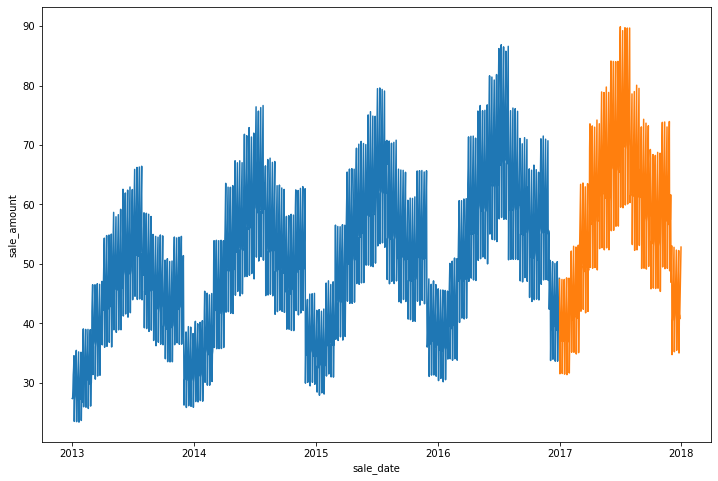

In [35]:
# show train and test data
plt.figure(figsize = (12,8))
sns.lineplot(data=train, x='sale_date', y='sale_amount')
sns.lineplot(data=test, x='sale_date', y='sale_amount')
plt.show()

### Resample and visualize

In [39]:
monthly_totals = train.resample('M').sum()

<AxesSubplot:xlabel='sale_date', ylabel='sale_amount'>

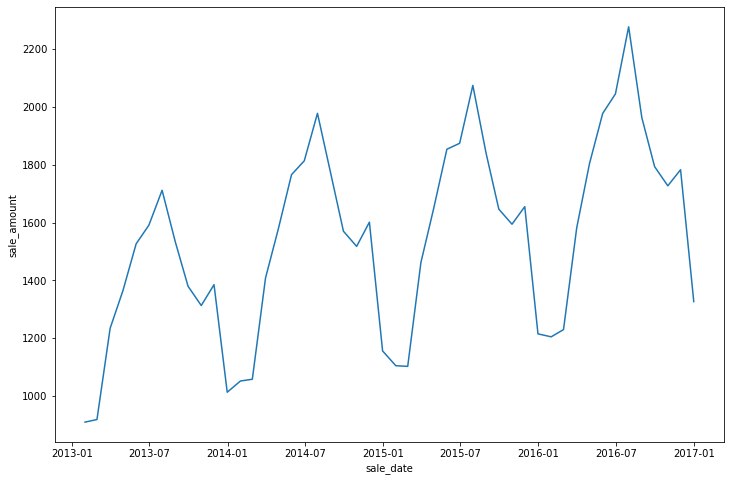

In [42]:
sns.lineplot(data=monthly_totals, x='sale_date', y='sale_amount')

**Monthly peaks in the summer and sharp drops in January**

In [44]:
weekly_totals = train.resample('w').sum()

<AxesSubplot:xlabel='sale_date', ylabel='sale_amount'>

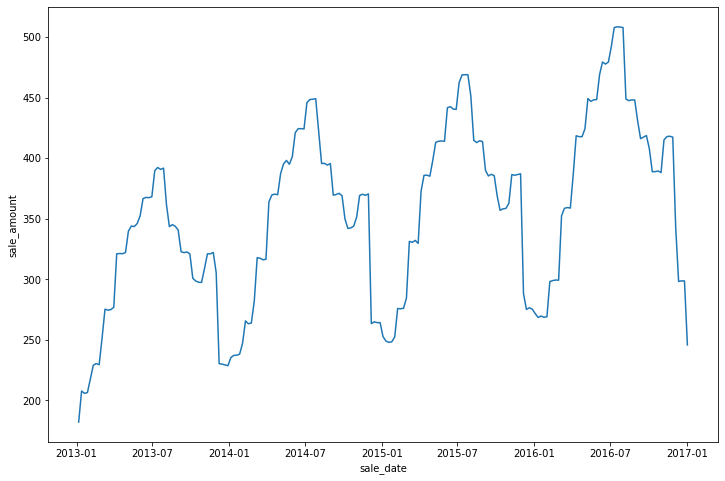

In [45]:
sns.lineplot(data=weekly_totals, x='sale_date', y ='sale_amount')

### Show moving averages

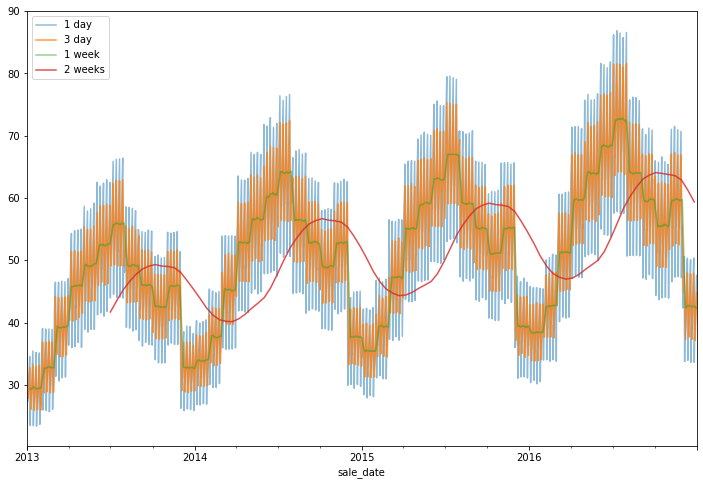

In [58]:
train.resample('D').sale_amount.mean().rolling(1).mean().plot(alpha=.5, label='1 day')
train.resample('D').sale_amount.mean().rolling(3).mean().plot(alpha=.8, label='3 day')
train.resample('D').sale_amount.mean().rolling(7).mean().plot(alpha=.5, label='1 week')
train.resample('2w').sale_amount.mean().rolling(14).mean().plot(alpha=.8, label='2 weeks')
plt.legend()

Text(0.5, 1.0, 'Daily Difference in Sales')

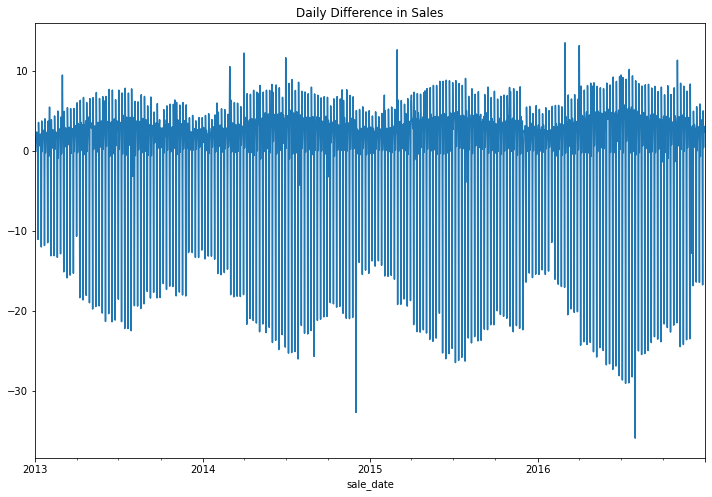

In [62]:
train.sale_amount.diff().plot()
plt.title('Daily Difference in Sales')

Text(0.5, 1.0, 'Weekly Difference in Sales')

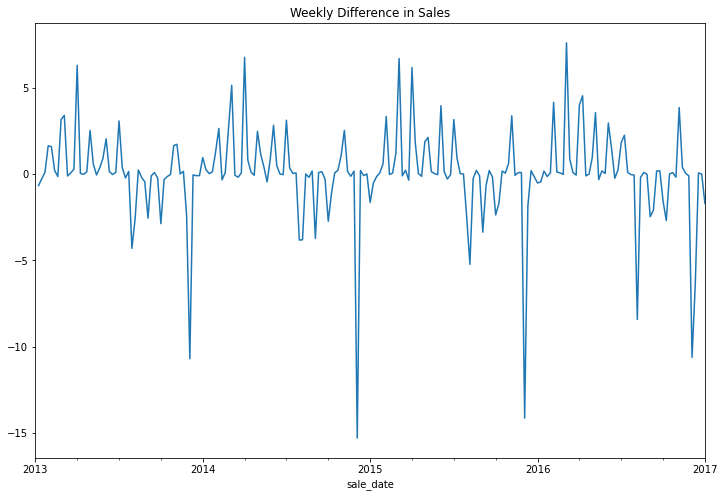

In [69]:
train.resample('W').sale_amount.mean().diff().plot()
plt.title('Weekly Difference in Sales')

Text(0.5, 1.0, 'Weekly Percentage Change in Sales')

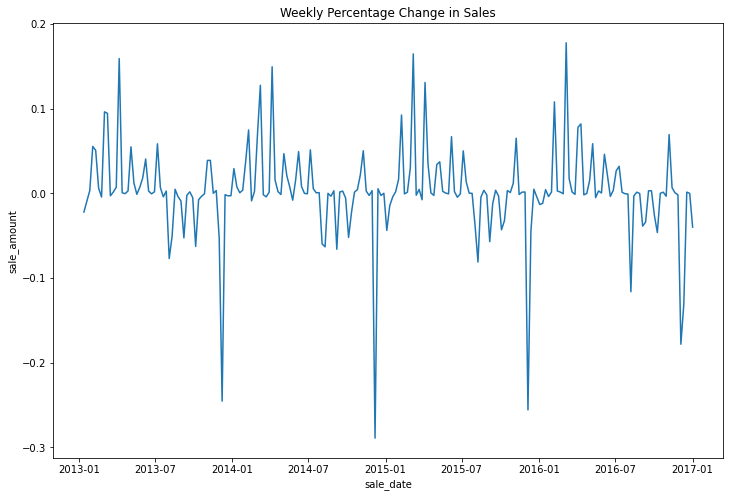

In [77]:
weekly_percentage = train.resample('W').mean().diff()/ train.resample('W').mean().shift()
sns.lineplot(data=weekly_percentage, x='sale_date', y='sale_amount')
plt.title("Weekly Percentage Change in Sales")

Text(0.5, 1.0, 'Monthly Difference in Sales')

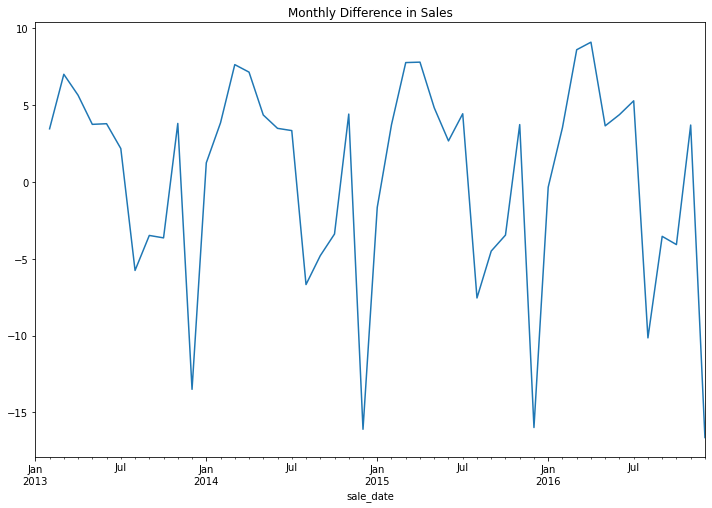

In [66]:
train.resample('M').sale_amount.mean().diff().plot()
plt.title('Monthly Difference in Sales')

Text(0.5, 1.0, 'Monthly Percentage Change in Sales')

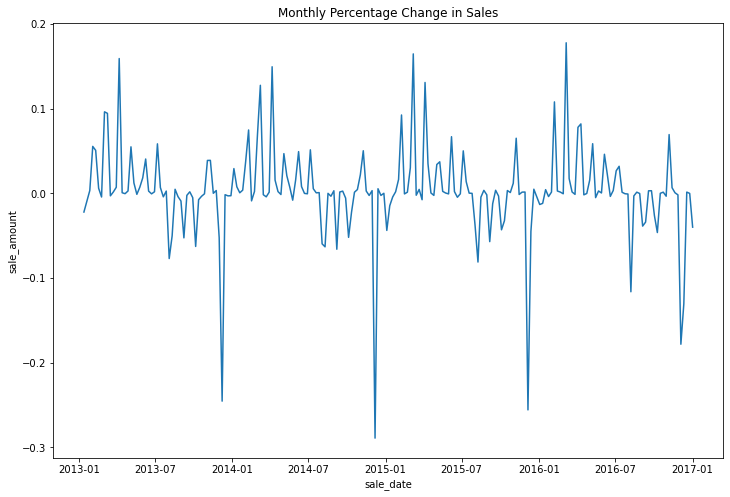

In [80]:
monthly_percentage = train.resample('W').mean().diff()/ train.resample('W').mean().shift()
sns.lineplot(data=monthly_percentage, x='sale_date', y='sale_amount')
plt.title("Monthly Percentage Change in Sales")

### Autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

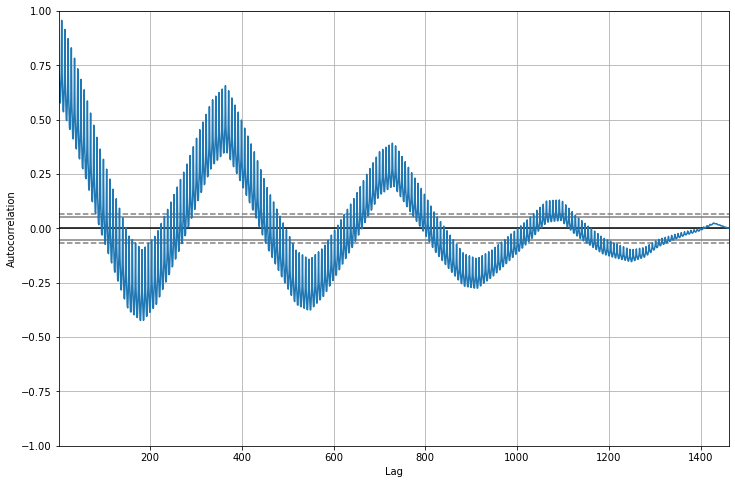

In [86]:
daily=train.resample('D').mean()
pd.plotting.autocorrelation_plot(daily.sales_total)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

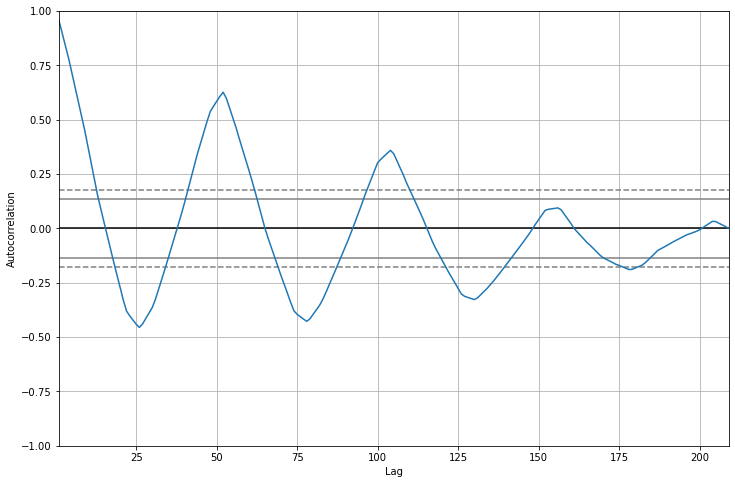

In [85]:
weekly=train.resample('W').mean()
pd.plotting.autocorrelation_plot(weekly.sales_total)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

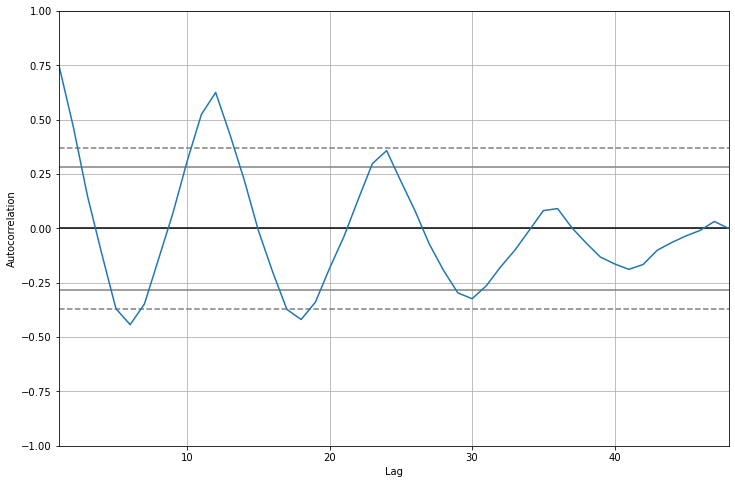

In [84]:
monthly=train.resample('M').mean()
pd.plotting.autocorrelation_plot(monthly.sales_total)

In [91]:
train['month']=train.index.strftime('%m-%b')

In [93]:
train['year']=train.index.year

<AxesSubplot:xlabel='month', ylabel='sale_amount'>

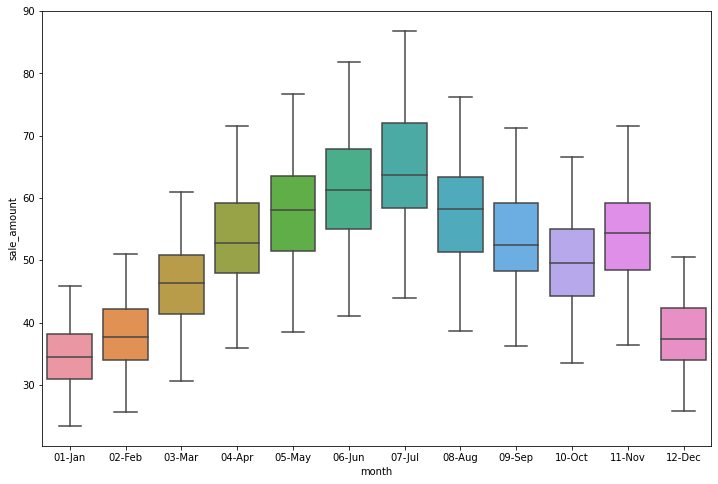

In [94]:
sns.boxplot(data = train, x = 'month', y = 'sale_amount')

<AxesSubplot:xlabel='year', ylabel='sale_amount'>

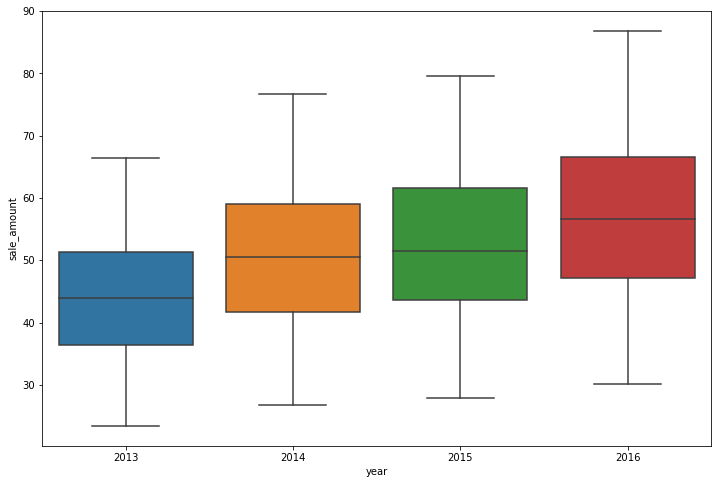

In [95]:
sns.boxplot(data = train, x = 'year', y = 'sale_amount')

### Seasonal Decomposition

In [98]:
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [99]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,30.355667,NaN,-14.406312,NaN
2013-01-13 00:00:00+00:00,29.686286,NaN,-14.747474,NaN
2013-01-20 00:00:00+00:00,29.414286,NaN,-14.840886,NaN
2013-01-27 00:00:00+00:00,29.513714,NaN,-14.931698,NaN
2013-02-03 00:00:00+00:00,31.150571,NaN,-14.412598,NaN


<AxesSubplot:xlabel='sale_date'>

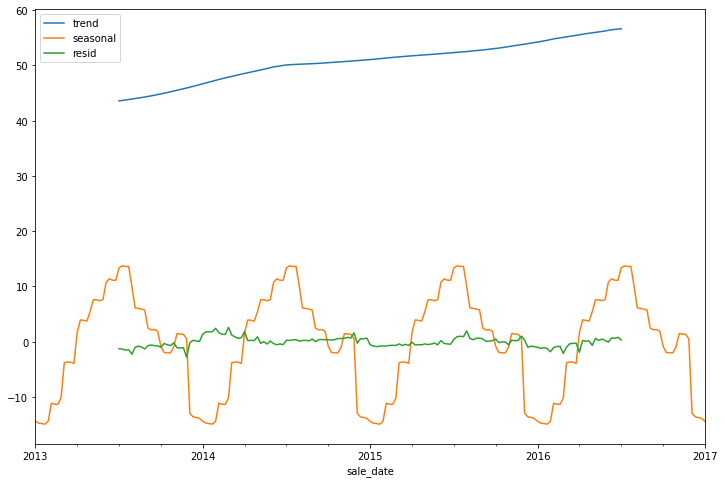

In [100]:
decomposition.iloc[:, 1:].plot()

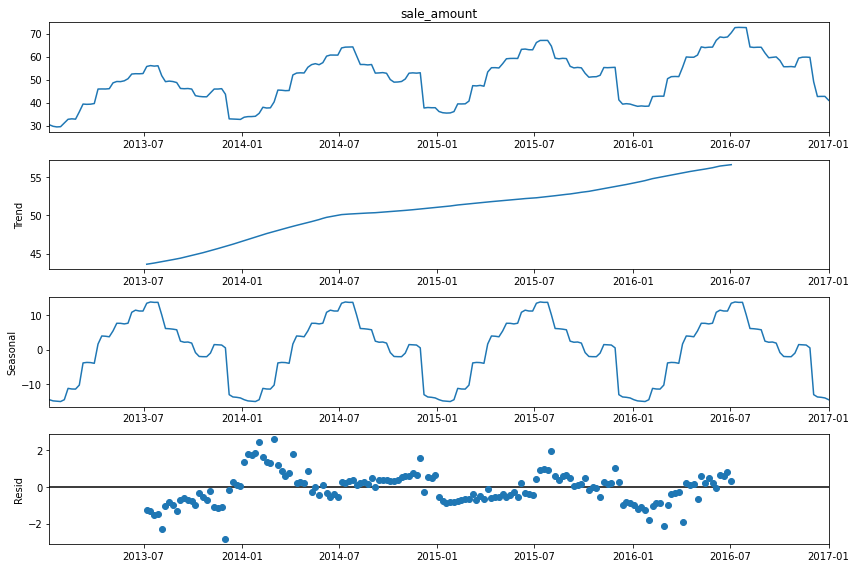

In [101]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None